Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [377]:
import numpy as np
a = np.random.random((10,3))
print(a)
print("RESULT: ", a[np.arange(10), np.argmin(abs(a - 0.5), axis = 1)])

[[5.56668549e-01 5.65928892e-01 9.61729912e-01]
 [9.81596188e-01 6.67509250e-01 2.99021044e-01]
 [1.89796554e-01 6.77932806e-01 5.80188610e-01]
 [2.25442952e-01 3.65963958e-02 2.96910127e-01]
 [3.83653151e-01 6.99684829e-01 1.95447667e-01]
 [5.78941247e-01 7.42870820e-01 9.64881171e-01]
 [5.99114161e-02 1.19224133e-01 9.15306908e-01]
 [7.41080462e-01 1.01761118e-01 1.77155512e-01]
 [5.78436195e-01 3.41606595e-01 9.41703720e-04]
 [6.70949116e-01 4.66221913e-01 2.53415626e-01]]
RESULT:  [0.55666855 0.66750925 0.58018861 0.29691013 0.38365315 0.57894125
 0.11922413 0.74108046 0.57843619 0.46622191]


Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [378]:
a = np.random.random((6, 6))
print(a)
print("RESULT: ", np.sum(a, axis = 1) / np.min(a, axis = 0))

[[0.95666048 0.08478148 0.75024283 0.87367559 0.54055433 0.17806461]
 [0.47278612 0.59333623 0.42958282 0.36268539 0.85003649 0.33199606]
 [0.10588939 0.20634894 0.45346023 0.64163576 0.06457916 0.83882578]
 [0.61485578 0.73583094 0.62758692 0.02963633 0.27799249 0.23368598]
 [0.17939026 0.35698323 0.93835559 0.92617223 0.99605639 0.07422956]
 [0.52004083 0.89094315 0.99526923 0.03539947 0.85477592 0.50930749]]
RESULT:  [31.95768038 35.86187936  5.37903091 85.01688242 53.75088641 51.26981866]


На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [379]:
x = np.array([6,2,0,3,0,0,5,7,0])
print(x)
print("RESULT: ", np.max(np.array([x[i] for i in np.arange(1, len(x)) if (x[i - 1] == 0)])))

[6 2 0 3 0 0 5 7 0]
RESULT:  5


Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [380]:
x = np.ones(10)
i = np.array([0,1,2,3,5,5,5,8])
x[i]+=np.bincount(i)[i]
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [375]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(obs, number_of_clusters, iter_max=20, dif_dis=1e-05):
    dis = 1
    iter=0
    new_dis = 0
    old_dis = 0

    data = obs[:,0] + obs[:,1]*1j

    centroids = np.array([[data[-5*i] for i in range(0,number_of_clusters)]]) #initial centroids
    new_centroids = centroids

    while ((dis > dif_dis) and (iter<iter_max)):  
         iter+=1      
         centroids = new_centroids
         clusters = np.argmin(abs(data - centroids.T), axis = 0)

         new_centroids.fill(0)
         
         for i in range(0,clusters.size):
             new_centroids[0][clusters[i]]+=data[i]

         new_centroids[0] /= np.hstack((np.bincount(clusters), np.ones(number_of_clusters - np.bincount(clusters).size)))

         new_dis = np.sum(abs(data - centroids.T[clusters].ravel()))
         dis = abs(old_dis - new_dis)
         old_dis = new_dis


    result = np.ones((number_of_clusters, 2))
    result[:,0] = new_centroids.real
    result[:,1] = new_centroids.imag
    
    return (result, new_dis/number_of_clusters)

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

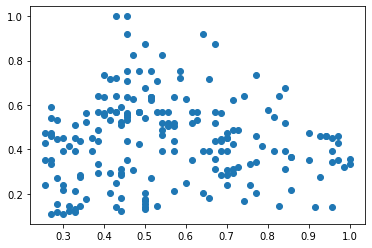

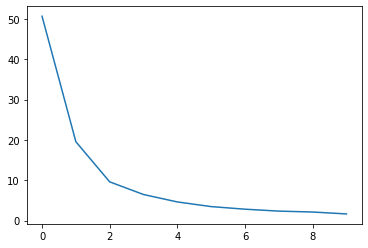

[0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 0
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3
 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 1 3 1 3 3 3 1 3 3 3 1 3 2 3 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


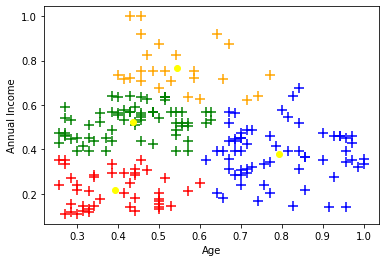

In [372]:
import matplotlib.pyplot as plt
import scipy.cluster

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
age_income = data[:, [2,3]]
age_income = age_income.astype(float)
age_income[:,0] = age_income[:,0] / np.max(age_income[:,0])
age_income[:,1] = age_income[:,1] / np.max(age_income[:,1])
plt.scatter(age_income[:,0], age_income[:,1])
plt.show()

dis = np.empty(10)
for number in range(0,dis.size):
    a, b = kmeans(age_income, number+1)
    dis[number] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 4
a = kmeans(age_income, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])
clusters = np.argmin(abs(age_income[:,0] + age_income[:,1]*1j - z.T), axis = 0)
print(clusters)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = age_income[i,:]
                j = j+1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

Годовой доход в целом некоррелирует с возрастом покупателя

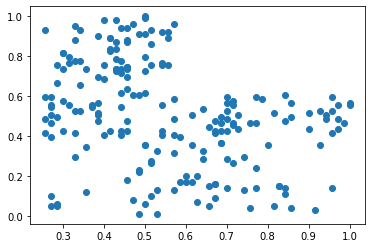

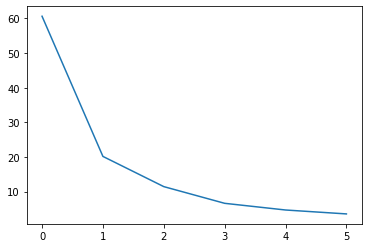

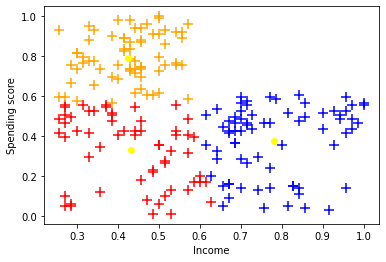

In [373]:
age_score = data[:, [2,4]]
age_score = age_score.astype(float)
age_score[:,0] = age_score[:,0] / np.max(age_score[:,0])
age_score[:,1] = age_score[:,1] / np.max(age_score[:,1])
plt.scatter(age_score[:,0], age_score[:,1])
plt.show()

dis = np.empty(6)
for number in range(1,dis.size+1):
    a, b = kmeans(age_score, number)
    dis[number-1] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 3
a = kmeans(age_score, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])

clusters = np.argmin(abs(age_score[:,0] + age_score[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = age_score[i,:]
                j = j + 1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.show()

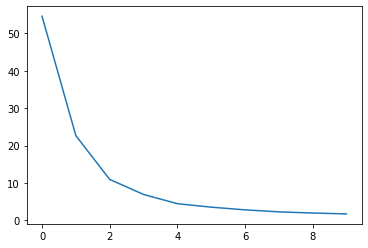

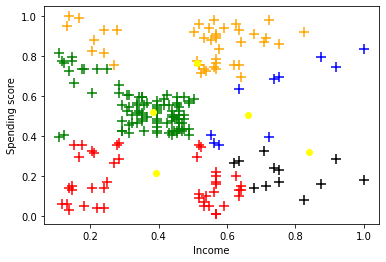

In [376]:
income_score = data[:, [3,4]]
income_score = income_score.astype(float)
income_score[:,0] = income_score[:,0] / np.max(income_score[:,0])
income_score[:,1] = income_score[:,1] / np.max(income_score[:,1])

dis = np.empty(10)
for number in range(1,dis.size+1):
    a, b = kmeans(income_score, number)
    dis[number-1] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 5
a = kmeans(age_income, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])

clusters = np.argmin(abs(income_score[:,0] + income_score[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = income_score[i,:]
                j = j + 1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.show()